In [91]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# CLEANING

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PORTFOLIO GIOVALDI/RECOMMENDER SYSTEM/buku.csv")
df.head(1)

,book_id,goodreads_book_id,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,medium_image_url,small_image_url,desc,genre,image_url
0,27,1,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,\r\nWhen Harry Potter and the Half-Blood Princ...,fantasy,https://images.gr-assets.com/books/1361039191l...


In [3]:
df_describe =[]

for i in df.columns:
    df_describe.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])

DESC = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique']) #memberi nama kolom 
DESC

,column,type,nan,nan%,nunique,unique
0,book_id,int64,0,0.00,10000,"[27, 21, 2, 18, 24, 3275, 3753, 54, 337, 374, ..."
1,goodreads_book_id,int64,0,0.00,10000,"[1, 2, 3, 5, 6, 8, 10, 11, 13, 21, 24, 25, 26,..."
2,authors,object,0,0.00,4664,"[J.K. Rowling, Mary GrandPré, J.K. Rowling, Ma..."
3,original_publication_year,float64,21,0.21,293,"[2005.0, 2003.0, 1997.0, 1999.0, 2000.0, 1979...."
4,original_title,object,585,5.85,9274,"[Harry Potter and the Half-Blood Prince, Harry..."
5,title,object,0,0.00,9964,[Harry Potter and the Half-Blood Prince (Harry...
6,language_code,object,1084,10.84,25,"[eng, en-US, nan, en-GB, en-CA, spa, fre, ger,..."
7,average_rating,float64,0,0.00,184,"[4.54, 4.46, 4.44, 4.53, 4.77, 4.73, 4.2, 4.37..."
8,ratings_count,int64,0,0.00,9003,"[1678823, 1735368, 4602479, 1832823, 1753043, ..."
9,medium_image_url,object,0,0.00,6669,[https://images.gr-assets.com/books/1361039191...


In [4]:
df = df.drop(['medium_image_url', 'small_image_url', 'original_title', 'goodreads_book_id'], axis=1) #mendrop kolom

## HANDLING MISSING VALUES
https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc 

### original_publication_year

In [5]:
#original_publication_year
df[df['original_publication_year'].isna() == True].head(21)

,book_id,authors,original_publication_year,title,language_code,average_rating,ratings_count,desc,genre,image_url
19,4229,"Chris Smith, Christopher Lee, Richard Taylor",NaN,The Lord of the Rings: Weapons and Warfare,eng,4.53,18788,\r\nShe won't rest until she's sent every walk...,fantasy,https://s.gr-assets.com/assets/nophoto/book/11...
933,9197,Raymond Chandler,NaN,Trouble Is My Business,eng,4.05,9020,\r\nSkulduggery Pleasant is lost on the other ...,mystery,https://images.gr-assets.com/books/1388189902l...
2569,6429,Carolyn Keene,NaN,Nancy Drew: #1-64,eng,4.19,16743,\r\nThirteenth-century Wales is a divided coun...,mystery,https://s.gr-assets.com/assets/nophoto/book/11...
3313,976,"Robert Kapilow, Dr. Seuss",NaN,"Dr. Seuss's Green Eggs and Ham: For Soprano, B...",NaN,4.44,90574,"\r\nThe Golden Compass, The Subtle Knife, and ...",children-s-books,https://s.gr-assets.com/assets/nophoto/book/11...
4264,7646,Gloria Levine,NaN,Ralph S. Mouse by Beverly Cleary: Teacher Guid...,NaN,3.95,14513,\r\nAuschwitz-Birkenau is the site of the larg...,childrens,https://s.gr-assets.com/assets/nophoto/book/11...
4877,4410,Jude Fisher,NaN,The Lord of the Rings: The Return of the King:...,eng,4.59,17526,\r\nIt has been four months since a mysterious...,fantasy,https://s.gr-assets.com/assets/nophoto/book/11...
4882,8477,Jill Murphy,NaN,"The Worst Witch (Worst Witch, #1)",NaN,3.94,13003,\r\nThe final book in the Regeneration Trilogy...,fantasy,https://s.gr-assets.com/assets/nophoto/book/11...
5514,7417,"Giles Andreae, Guy Parker-Rees",NaN,Giraffes Can't Dance,en-US,4.28,14144,"\r\nDANICA SHARDAE IS an avian shapeshifter, a...",picture-books,https://images.gr-assets.com/books/1306505271l...
5584,7216,Rod Campbell,NaN,Dear Zoo: A Lift-the-Flap Book,NaN,4.25,16432,\r\nA pampered millionaire's son tumbles overb...,childrens,https://images.gr-assets.com/books/1391337388l...
5675,3506,Yuu Watase,NaN,"Absolute Boyfriend, Vol. 1",eng,4.01,29385,\r\nGraphic novel star Kazu Kibuishi creates a...,manga,https://s.gr-assets.com/assets/nophoto/book/11...


In [6]:
# https://www.goodreads.com
df.fillna(value={'original_publication_year':2003},limit=1,inplace=True)
df.fillna(value={'original_publication_year':1988},limit=1,inplace=True)
df.fillna(value={'original_publication_year':2002},limit=1,inplace=True)
df.fillna(value={'original_publication_year':1995},limit=1,inplace=True)
df.fillna(value={'original_publication_year':1999},limit=1,inplace=True)
df.fillna(value={'original_publication_year':1955},limit=1,inplace=True)
df.fillna(value={'original_publication_year':2004},limit=1,inplace=True)
df.fillna(value={'original_publication_year':1999},limit=1,inplace=True)
df.fillna(value={'original_publication_year':1982},limit=1,inplace=True)
df.fillna(value={'original_publication_year':2011},limit=1,inplace=True)
df.fillna(value={'original_publication_year':2004},limit=1,inplace=True)
df.fillna(value={'original_publication_year':2007},limit=1,inplace=True)
df.fillna(value={'original_publication_year':2008},limit=1,inplace=True)
df.fillna(value={'original_publication_year':2009},limit=1,inplace=True)
df.fillna(value={'original_publication_year':2009},limit=1,inplace=True)
df.fillna(value={'original_publication_year':2009},limit=1,inplace=True)
df.fillna(value={'original_publication_year':2009},limit=1,inplace=True)
df.fillna(value={'original_publication_year':2010},limit=1,inplace=True)
df.fillna(value={'original_publication_year':2010},limit=1,inplace=True)
df.fillna(value={'original_publication_year':2010},limit=1,inplace=True)
df.fillna(value={'original_publication_year':2013},limit=1,inplace=True)

In [7]:
df['original_publication_year'] = df['original_publication_year'].astype('int')

### genre

In [8]:
#genre
df[df['genre'].isna() == True].head(5)

,book_id,authors,original_publication_year,title,language_code,average_rating,ratings_count,desc,genre,image_url
959,2485,Robert McCammon,1987,Swan Song,eng,4.28,38018,"\r\nThe last live broadcast on Polish Radio, o...",NaN,https://images.gr-assets.com/books/1445981000l...
6913,7588,Jennifer L. Holm,2010,Turtle in Paradise,en-US,3.93,14714,\r\nCarolyn's not so different from the other ...,NaN,https://s.gr-assets.com/assets/nophoto/book/11...
7102,5353,Jeff Kinney,2010,The Wimpy Kid Movie Diary (Diary of a Wimpy Kid),en-US,4.16,15956,\r\nA New York Times bestselling epic. A block...,NaN,https://images.gr-assets.com/books/1328811516l...
9416,9306,Colleen Oakley,2015,Before I Go,NaN,3.79,8181,"\r\nJosie Tyrell, art model, runaway, and deni...",NaN,https://images.gr-assets.com/books/1397917357l...
9636,8300,Kim van Alkemade,2015,Orphan Number Eight,eng,3.69,9558,\r\nWhen she is caught in the backseat of a ca...,NaN,https://images.gr-assets.com/books/1416424263l...


In [9]:
df.fillna(value={'genre':'horror'},limit=1,inplace=True)
df.fillna(value={'genre':'historical-fiction'},limit=1,inplace=True)
df.fillna(value={'genre':'non-fiction'},limit=1,inplace=True)
df.fillna(value={'genre':'romance'},limit=1,inplace=True)
df.fillna(value={'genre':'historical-fiction'},limit=1,inplace=True)

### desc

In [10]:
#desc
df[df['desc'].isna() == True].head(2)

,book_id,authors,original_publication_year,title,language_code,average_rating,ratings_count,desc,genre,image_url
4265,7846,Erin Hunter,2007,"The Sight (Warriors: Power of Three, #1)",en-US,4.27,15904,NaN,warriors,https://images.gr-assets.com/books/1363489119l...
4868,7848,Kate Grenville,2005,The Secret River,eng,3.79,11051,NaN,historical-fiction,https://s.gr-assets.com/assets/nophoto/book/11...


In [11]:
df.fillna(value={"dec":"The Sight is a children's fantasy novel. It was released on 24 April 2007, and it is the first installment of the Warriors: Power of Three series by Erin Hunter. The book was recommended as Children's Summer Reading by the Washington Post Children's Book Club."},limit=1,inplace=True)
df.fillna(value={"dec":"The Secret River is a 2005 historical novel by Kate Grenville about an early 19th-century Englishman transported to Australia for theft. The story explores what might have happened when Europeans colonised land already inhabited by Aboriginal people."},limit=1,inplace=True)

### language_code

In [12]:
#language_code
df['language_code'].describe()

count     8916
unique      25
top        eng
freq      6341
Name: language_code, dtype: object

In [13]:
df['language_code'] = df['language_code'].fillna('eng')

## DUPLICATED VALUES

In [14]:
df = df.drop_duplicates() # drop duplicated value
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    9998 non-null   int64  
 1   authors                    9998 non-null   object 
 2   original_publication_year  9998 non-null   int64  
 3   title                      9998 non-null   object 
 4   language_code              9998 non-null   object 
 5   average_rating             9998 non-null   float64
 6   ratings_count              9998 non-null   int64  
 7   desc                       9998 non-null   object 
 8   genre                      9998 non-null   object 
 9   image_url                  9998 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 859.2+ KB


In [16]:
# df.to_csv("/content/drive/MyDrive/Colab Notebooks/PORTFOLIO GIOVALDI/RECOMMENDER SYSTEM/clean.csv",index=False)

# EXPLORATORY DATA ANALYSIS

In [197]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PORTFOLIO GIOVALDI/RECOMMENDER SYSTEM/clean.csv")
df.head(1)

,book_id,authors,original_publication_year,title,language_code,average_rating,ratings_count,desc,genre,image_url
0,27,"J.K. Rowling, Mary GrandPré",2005,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,\r\nWhen Harry Potter and the Half-Blood Princ...,fantasy,https://images.gr-assets.com/books/1361039191l...


In [198]:
def diagnostic_plots(data,variabel): # fungsi def untuk memplot istribusi kolom di dataset
    #ukuran
    plt.figure(figsize=(20,10)) #ukuran kesamping dan kebawah
    #histogram
    plt.subplot(1,2,1) #row, kolom, index
    sns.histplot(x=df[variabel], data=df, color="skyblue")
    plt.title("Histogram") #titel/judul
    # Boxplot
    plt.subplot(1,2,2)#row,kolom,index
    sns.boxplot(y=df[variabel], color="skyblue") #menggunakan plot boxplot 
    plt.title("Boxplot") #titel/judul
    
    plt.show() #mengeluarkan

In [ ]:
# Q1 = np.percentile(df['average_rating'], 25,
#                    interpolation = 'midpoint')
 
# Q3 = np.percentile(df['average_rating'], 75,
#                    interpolation = 'midpoint')
# IQR = Q3 - Q1 
# # Upper bound
# upper = np.where(df['average_rating']>= (Q3+1.5*IQR))
# # Lower bound
# lower = np.where(df['average_rating'] <= (Q1-1.5*IQR))
 
# ''' Removing the Outliers '''
# df.drop(upper[0], inplace = True)
# df.drop(lower[0], inplace = True)

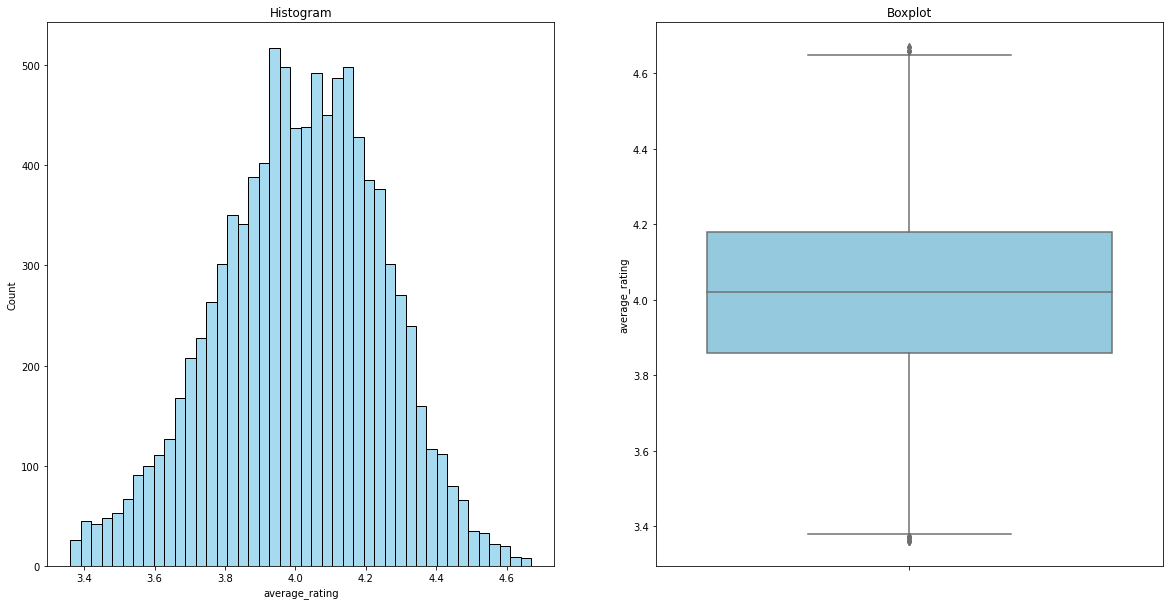

In [163]:
diagnostic_plots(df,'average_rating')

Text(0.5, 1.0, 'Best Rating')

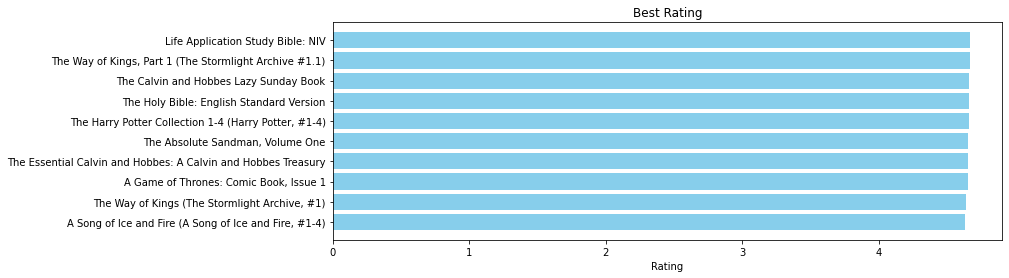

In [166]:
pop= df.sort_values('average_rating', ascending=False)
plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(10),pop['average_rating'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Rating")
plt.title("Best Rating")

In [168]:
# Book with the highest average rating:
df[['book_id', 'authors', 'title', 'average_rating', 'ratings_count']] \
     .sort_values('average_rating', ascending = False).head(10)

,book_id,authors,title,average_rating,ratings_count
4594,5919,"Anonymous, Ronald A. Beers, Ronald A. Beers",Life Application Study Bible: NIV,4.67,13614
7491,9141,Brandon Sanderson,"The Way of Kings, Part 1 (The Stormlight Archi...",4.67,9792
1681,5580,Bill Watterson,The Calvin and Hobbes Lazy Sunday Book,4.66,18641
6530,4778,Anonymous,The Holy Bible: English Standard Version,4.66,17863
3488,2101,"J.K. Rowling, Mary GrandPré","The Harry Potter Collection 1-4 (Harry Potter,...",4.66,43929
1641,8109,"Neil Gaiman, Mike Dringenberg, Chris Bachalo, ...","The Absolute Sandman, Volume One",4.65,13401
2382,1010,Bill Watterson,The Essential Calvin and Hobbes: A Calvin and ...,4.65,93001
9171,5344,"Daniel Abraham, George R.R. Martin, Tommy Patt...","A Game of Thrones: Comic Book, Issue 1",4.65,18667
7046,562,Brandon Sanderson,"The Way of Kings (The Stormlight Archive, #1)",4.64,144822
7603,2149,George R.R. Martin,A Song of Ice and Fire (A Song of Ice and Fire...,4.63,28654


Text(0.5, 1.0, 'Popular Books')

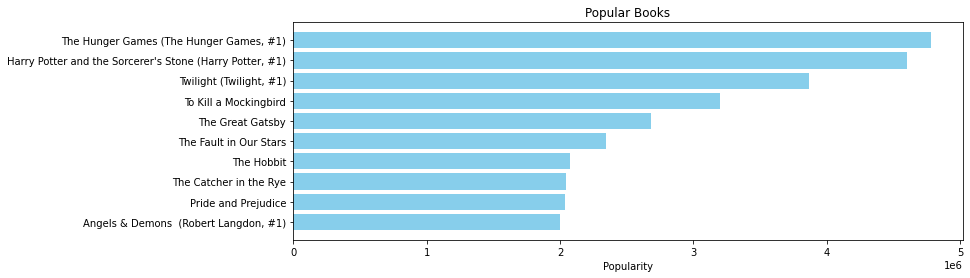

In [164]:
pop= df.sort_values('ratings_count', ascending=False)
plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(10),pop['ratings_count'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Books")

Text(0.5, 1.0, 'Popular Authors')

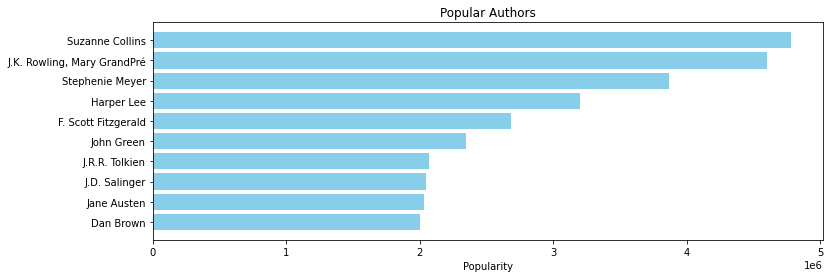

In [165]:
pop= df.sort_values('ratings_count', ascending=False)
plt.figure(figsize=(12,4))
plt.barh(pop['authors'].head(10),pop['ratings_count'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Authors")

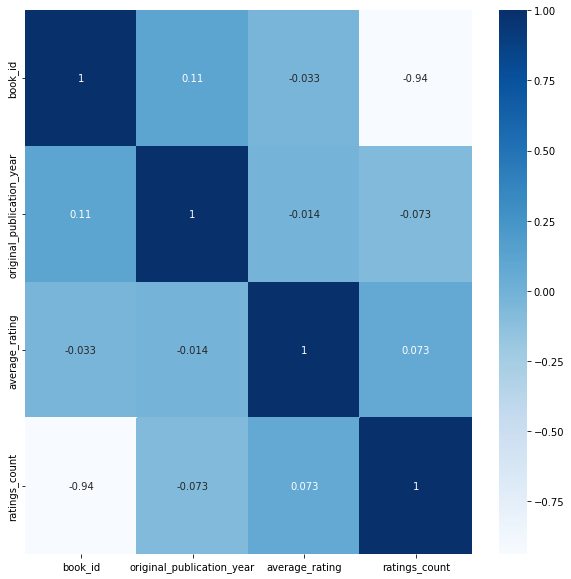

In [167]:
plt.figure(figsize=(10, 10)) #ukuran 
sns.heatmap(df.corr('spearman'),annot=True, cmap="Blues") #anotasi true dengan korelasi spearman
plt.savefig('Corr.png') #mensave hasil plot ke png

# FEATURE ENGINEERING

In [199]:
# http://www.mathguide.de/info/tools/languagecode.html 
# df['language_code'].unique()
df['language_code'] = df['language_code'].replace('eng','en')

In [200]:
df = df.drop(columns=['image_url','language_code'])

In [201]:
df['book_id'] = np.arange(len(df))
df['authors'] = df['authors'].astype('str').apply(lambda x: str.lower(x.replace(",", " ")))

In [202]:
df = pd.concat((df,pd.get_dummies(df.genre)),1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


In [203]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/PORTFOLIO GIOVALDI/RECOMMENDER SYSTEM/clean1.csv",index=False)

In [204]:
genre = ['fantasy']
year = (-1750,2017)

# MODELLING (DEMOGRAPHIC)

In [205]:
class RecommenderSystem:
  def __init__(self,data):
    self.df = pd.read_csv(data)

  def recommend(self, genre=None, year=None):
    df = self.df.copy()
    df = self.demographic_filter(df, genre=genre, year=year)
    df = self.compute_imdb_score(df)

    result = df[['title',"authors","original_publication_year",'genre','average_rating','ratings_count','score']]
    result = result.sort_values("score", ascending = False)
    result = result.head(10)
    return result
  
  @staticmethod
  def demographic_filter(df, genre=None, year=None):
    df = df.copy()
    if genre is not None:
      df = df[df[genre].all(axis=1)]
    if year is not None:
      df = df[df.original_publication_year.between(year[0], year[1])]
    return df

  @staticmethod
  def compute_imdb_score(df, q=0.8):
    df = df.copy()
    m = df.ratings_count.quantile(q)
    C = (df.average_rating * df.ratings_count).sum() / df.ratings_count.sum()
    df = df[df.ratings_count >= m]
    df['score'] = df.apply(lambda x: (x.average_rating * x.ratings_count + C *m) / (x.ratings_count +m), axis=1)
    return df

In [206]:
recsys = RecommenderSystem(data="/content/drive/MyDrive/Colab Notebooks/PORTFOLIO GIOVALDI/RECOMMENDER SYSTEM/clean1.csv")

In [213]:
recsys.recommend(genre=['fantasy'])

,title,authors,original_publication_year,genre,average_rating,ratings_count,score
3890,Harry Potter and the Deathly Hallows (Harry Po...,j.k. rowling mary grandpré,2007,fantasy,4.61,1746574,4.596249
0,Harry Potter and the Half-Blood Prince (Harry ...,j.k. rowling mary grandpré,2005,fantasy,4.54,1678823,4.528183
3,Harry Potter and the Prisoner of Azkaban (Harr...,j.k. rowling mary grandpré rufus beck,1999,fantasy,4.53,1832823,4.519467
4,Harry Potter and the Goblet of Fire (Harry Pot...,j.k. rowling mary grandpré,2000,fantasy,4.53,1753043,4.519004
8882,"Words of Radiance (The Stormlight Archive, #2)",brandon sanderson,2014,fantasy,4.77,73572,4.513005
7046,"The Way of Kings (The Stormlight Archive, #1)",brandon sanderson,2010,fantasy,4.64,144822,4.510503
4216,The Name of the Wind (The Kingkiller Chronicle...,patrick rothfuss,2007,fantasy,4.55,400101,4.504108
2834,"A Storm of Swords (A Song of Ice and Fire, #3)",george r.r. martin,2000,fantasy,4.54,469022,4.501229
5847,"The Wise Man's Fear (The Kingkiller Chronicle,...",patrick rothfuss,2011,fantasy,4.57,245686,4.497032
9169,"Clockwork Princess (The Infernal Devices, #3)",cassandra clare,2013,fantasy,4.59,162099,4.484248
